# [The Impact of Smartphones on the Camera Industry](https://www.reddit.com/r/dataisbeautiful/comments/d4mh5k/the_impact_of_smartphones_on_the_camera_industry/)

In this notebook I set out to recreate the following graphic from /r/dataisbeautiful subreddit:

![](https://i.redd.it/lrlfen2x7sm31.jpg)

## Get the data

First, I import some common data science Python libraries:

In [0]:
import numpy as np # numpy for arrays and matrices
import pandas as pd # pandas for data manipulation
import matplotlib.pyplot as plt # matplotlib for plotting

For camera data, the authors citation used the following source from [CISPA](http://www.cipa.jp/stats/documents/common/cr200.pdf).  I used the same souce and converted the PDF to a table using Adobe Acrobat's export to Excel feature and saved the relevant columns to a csv. 

For smarphone sales, the author used Statista, which is a paid service.  Since I didn't have access, I used an the following source from [Wikipedia](https://en.wikipedia.org/wiki/List_of_best-selling_mobile_phones#Annual_sales_by_manufacturer).  I copied the table into Excel and saved the file as a csv.

In [0]:
# read csv files into pandas DataFrames
df_cameras = pd.read_csv('https://raw.githubusercontent.com/lejimmy/data-is-beautiful/master/smartphones-impact/cr200.csv')
df_phones = pd.read_csv('https://raw.githubusercontent.com/lejimmy/data-is-beautiful/master/smartphones-impact/phone-sales.csv')

In [3]:
# preview camera table
df_cameras.head(10)

,year,shipments,value
0,1951,258,2526
1,1952,376,4353
2,1953,586,6476
3,1954,787,8516
4,1955,949,9816
5,1956,1178,12625
6,1957,1292,14304
7,1958,1296,13841
8,1959,1725,16567
9,1960,1746,17659


In [4]:
# summary of camera table
df_cameras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
year         68 non-null int64
shipments    68 non-null int64
value        68 non-null int64
dtypes: int64(3)
memory usage: 1.7 KB


In [5]:
# preview phone table
df_phones.tail()

,Manufacturer,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015*,2016*,2017*,2018*
23,Vivo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.6848,NaN
24,Xiaomi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.529,65.6186,NaN,NaN,122.387
25,Yulong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6014,NaN,NaN,NaN,NaN,NaN
26,ZTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.7687,56.8818,67.3444,59.8988,53.910,NaN,NaN,NaN,NaN
27,Total,NaN,NaN,NaN,NaN,NaN,107.818,162.856,283.581,412.731,399.583,423.4185,519.9855,674.0019,816.5629,990.8625,1152.8398,1222.2452,1211.2366,1596.8024,1774.5641,1746.1756,1806.9647,1878.968,1423.9003,1495.358,1536.5355,1555.267


In [6]:
# summary of phone table
df_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 28 columns):
Manufacturer    28 non-null object
1992            3 non-null float64
1993            1 non-null float64
1994            3 non-null float64
1995            1 non-null float64
1996            2 non-null float64
1997            6 non-null float64
1998            7 non-null float64
1999            6 non-null float64
2000            6 non-null float64
2001            6 non-null float64
2002            5 non-null float64
2003            6 non-null float64
2004            6 non-null float64
2005            6 non-null float64
2006            5 non-null float64
2007            6 non-null float64
2008            8 non-null float64
2009            8 non-null float64
2010            12 non-null float64
2011            12 non-null float64
2012            12 non-null float64
2013            12 non-null float64
2014            13 non-null float64
2015*           7 non-null float64
2016*           7

From the data sources, I know that for the camera sales, the number of `shipments` is in thousands of units.

For the total camera phone sales, the `Total` is for millions of units sold across all manufacturers.

## Clean the data

Our goal is to have a final dataframe with only 3 columns: year, camera sales, and phone sales.

### Camera sales

For camera sales, we'll simply drop the value of camera sales and rename the `shipments` column to `camera_sales`.  We may revisit this at a future date if we are curious about how the value of shipments changed.

In [0]:
# drop the value columm
df_cameras.drop(columns = 'value', inplace = True)

In [0]:
# rename shipments column
df_cameras.rename(columns = {'shipments': 'camera_sales'}, inplace = True)

In [9]:
# view cleaned camera table
df_cameras

,year,camera_sales
0,1951,258
1,1952,376
2,1953,586
3,1954,787
4,1955,949
...,...,...
63,2014,43434
64,2015,35395
65,2016,24190
66,2017,24978


In [10]:
# summary of cleaned cameras table
df_cameras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
year            68 non-null int64
camera_sales    68 non-null int64
dtypes: int64(2)
memory usage: 1.2 KB


### Phone sales

For phone sales, there is a lot of extra information we don't need.  For this section, I previewed the table after each cleaning step to make sure I was getting closer to the desired result.

We will complete the following cleaning steps:
- Transpose and extract the row for `Total` phone sales
- Drop the `Manufacturer` row
- Rename years 2015-2018 to remove the `*` suffixes.
- Reset the index
- Rename the columns
- Convert data types

In [0]:
# rotate the table, and extract only row 27.
df_phones = pd.DataFrame(df_phones.T[27])

In [0]:
# drop manufacturer row
df_phones.drop('Manufacturer', axis = 0, inplace = True)

In [0]:
# use lambda function to extract only the first 4 numbers in each year
df_phones.rename(lambda x:x[:4], inplace = True)

In [0]:
# reset indices
df_phones.reset_index(inplace = True)

In [0]:
# rename columns
df_phones.rename(columns = {27: 'phone_sales', 'index': 'year'}, inplace = True)

In [0]:
# change column data types
df_phones['year'] = df_phones['year'].astype(int)
df_phones['phone_sales'] = df_phones['phone_sales'].astype(float)

In [17]:
# view cleaned phone table
df_phones

,year,phone_sales
0,1992,NaN
1,1993,NaN
2,1994,NaN
3,1995,NaN
4,1996,NaN
5,1997,107.8180
6,1998,162.8560
7,1999,283.5810
8,2000,412.7310
9,2001,399.5830


In [18]:
# summary of cleaned phone table
df_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
year           27 non-null int64
phone_sales    22 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


Now that both of our camera and phone shipment tables are cleaned, we will join them into one table with `year` as the matching column.

In [0]:
# left join
df_combined = df_cameras.merge(df_phones, how = 'left', left_on = 'year', right_on = 'year')

Since our phone sales data begins in `1997`, we'll replace missing values with 0

In [0]:
# fill in missing values with 0
df_combined['phone_sales'].fillna(0, inplace = True)

In [21]:
# preview combined table
df_combined

,year,camera_sales,phone_sales
0,1951,258,0.0000
1,1952,376,0.0000
2,1953,586,0.0000
3,1954,787,0.0000
4,1955,949,0.0000
...,...,...,...
63,2014,43434,1878.9680
64,2015,35395,1423.9003
65,2016,24190,1495.3580
66,2017,24978,1536.5355


In [22]:
# summary of combined table
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 3 columns):
year            68 non-null int64
camera_sales    68 non-null int64
phone_sales     68 non-null float64
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


As mentioned previously, the number of camera sales are in the 1000s and the number of phone sales is in the millions.  We'll adjust the numbers so we can graph them on the same scale here:

In [0]:
# divide camera sales by 1000 to share the same units
df_combined['camera_sales'] = df_combined['camera_sales'] / 1000

In [24]:
# preview combined table with final scale
df_combined

,year,camera_sales,phone_sales
0,1951,0.258,0.0000
1,1952,0.376,0.0000
2,1953,0.586,0.0000
3,1954,0.787,0.0000
4,1955,0.949,0.0000
...,...,...,...
63,2014,43.434,1878.9680
64,2015,35.395,1423.9003
65,2016,24.190,1495.3580
66,2017,24.978,1536.5355


## Plot the results

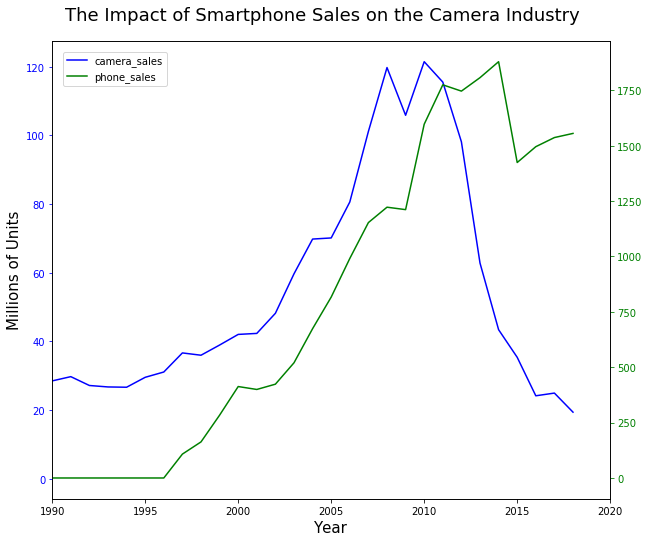

In [25]:
# use matplotlib library to plot two lines
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.plot('year', 'camera_sales', data = df_combined, color = 'blue')
ax1.set_xlim(1990,2020)
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('Millions of Units', fontsize = 15)
ax1.tick_params(axis = 'y', colors = 'b')

ax2 = ax1.twinx()
ax2.plot('year', 'phone_sales', data = df_combined, color = 'green')
ax2.tick_params(axis = 'y', colors = 'g')

fig.suptitle('The Impact of Smartphone Sales on the Camera Industry', fontsize = 18)
fig.subplots_adjust(top=.92)
fig.legend(loc = 'upper left', bbox_to_anchor = (0.08, 0.86))
fig.savefig('graph1.png');

# Conclusion:

As camera phones have become ubiquitous in our society, it is reasonable to assume that digital camera sales have plummeted.

Certainly the graphic makes the case that there is a correlation between the rise of the smartphone and the decline of the digital camera.

However, because of the different y-axis scales, this effect is dramatized.  If I replot the graph with the same shared y-axis:

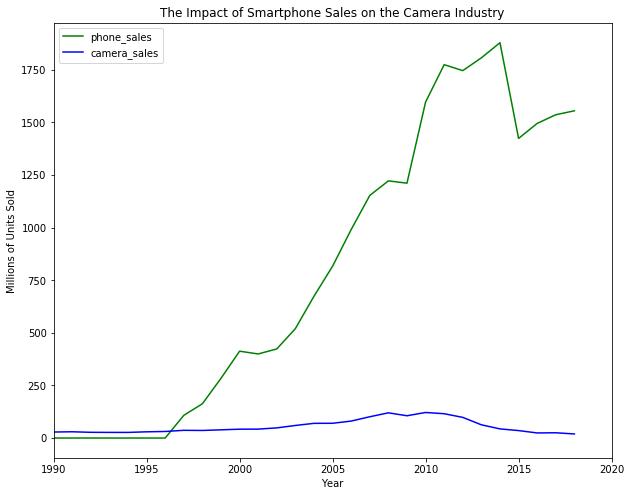

In [26]:
# replot on the same shared y axis
plt.figure(figsize=(10,8))
plt.plot('year', 'phone_sales', data = df_combined, color = 'g')
plt.plot('year', 'camera_sales', data = df_combined, color = 'b')
plt.title('The Impact of Smartphone Sales on the Camera Industry')
plt.xlim(1990, 2020)
plt.xlabel('Year')
plt.ylabel('Millions of Units Sold')
plt.legend()
plt.savefig('graph2.png');

From this chart, it appears that camera sales were not even a competing product.  Maybe the original chart received over 50k upvotes because it reinforced a popular assumption that "you don't need a digital camera anymore since every smartphone has one", but from my recreation, I'm not convinced this is the case.